**statistics**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv("/workspaces/Ravi-kumar-svce/Machine learning/Tokyo_Medals_2021.csv")
df

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
...,...,...,...,...,...,...
88,Ghana,0,0,1,1,77
89,Grenada,0,0,1,1,77
90,Kuwait,0,0,1,1,77
91,Republic of Moldova,0,0,1,1,77


In [39]:
df['Total'].mean()

11.612903225806452

In [40]:
np.average(df['Bronze Medal'],weights=df['Total'])

13.83611111111111

In [41]:
from scipy.stats import trim_mean
trim_mean(df['Gold Medal'],0.1)

1.96

In [42]:
df['Total'].median()

4.0

In [43]:
df.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


estimates of variability

In [44]:
#variance
from statistics import variance,stdev
variance(df['Gold Medal'])

49.315100514259

In [45]:
#standard deviation
stdev(df['Gold Medal'])

7.022471111671376

In [46]:
#meadian absoluete deviation
from numpy import median,absolute
median(absolute(df['Gold Medal']-median(df['Gold Medal'])))

1.0

In [47]:
#inter quartile range
q3,q1=np.percentile(df['Gold Medal'],[75,25])
iqr=q3-q1
iqr

3.0

**exploring the data visualization**

<AxesSubplot:>

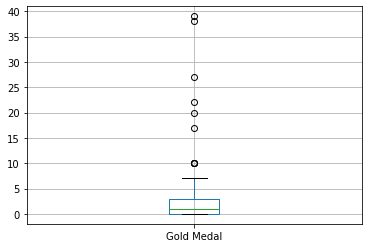

In [48]:
#box plots
df.boxplot(column='Gold Medal',by=None,ax=None)

In [49]:
#frequency table
freq_table=df.copy()
freq_table['freq']=pd.cut(df['Gold Medal'],10)
freq_table.groupby('freq')['Rank By Total'].count().reset_index()

,freq,Rank By Total
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


In [50]:
np.histogram(freq_table['Gold Medal'])

(array([72, 11,  4,  0,  1,  2,  1,  0,  0,  2]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]))

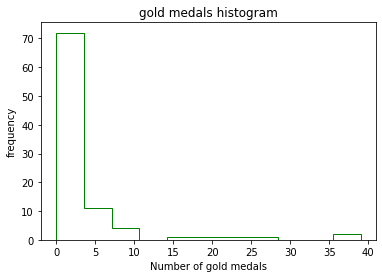

In [51]:
plt.hist(x=freq_table['Gold Medal'],bins=11,rwidth=0.95,color='g',histtype='step')
plt.xlabel('Number of gold medals')
plt.ylabel('frequency')
plt.title('gold medals histogram')
plt.show()

Text(0.5, 0, 'number of medals')

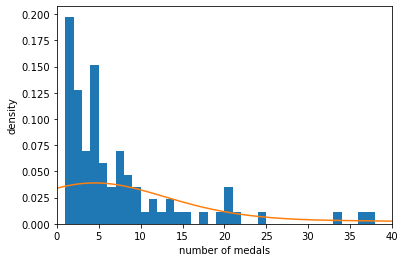

In [52]:
#density plot
ax=df['Total'].plot.hist(density=True,xlim=[0,40],bins=range(1,40))
df['Total'].plot.density(ax=ax)
plt.ylabel('density')
plt.xlabel('number of medals')

***explorting binary and categorical data***

In [53]:
#mode
df['Bronze Medal'].mode()

0    1
Name: Bronze Medal, dtype: int64

Text(0, 0.5, 'gold meadal')

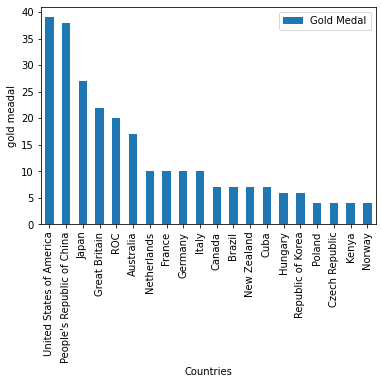

In [54]:
ax=df.iloc[:20].plot.bar(x='Country',y='Gold Medal')
ax.set_xlabel('Countries')
ax.set_ylabel('gold meadal')